In [4]:
#libararies need for RNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import load_model
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import os


In [49]:
#Data for test, TSLA, Rshape
df = pd.read_csv('TSLA.csv')

In [50]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
1,2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
2,2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
3,2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400
4,2015-01-08,212.809998,213.800003,210.009995,210.619995,210.619995,3442500
5,2015-01-09,208.919998,209.979996,204.960007,206.660004,206.660004,4668300
6,2015-01-12,203.050003,204.470001,199.250000,202.210007,202.210007,5950300
7,2015-01-13,203.320007,207.610001,200.910004,204.250000,204.250000,4477300
8,2015-01-14,185.830002,195.199997,185.000000,192.690002,192.690002,11551900
9,2015-01-15,194.490005,195.750000,190.000000,191.869995,191.869995,5216500


In [51]:
#shaping data
df = df['Open'].values
df = df.reshape(-1, 1) #creates a new row with everything in the first coloumn
print(df.shape)

(1258, 1)


In [46]:
#split data
ds_train = np.array(df[:int(df.shape[0]*0.80)])
ds_test = np.array(df[int(df.shape[0]*0.80)-50:])
scaler = MinMaxScaler(feature_range=(0,1))
ds_train = scaler.fit_transform(ds_train)
ds_test = scaler.fit_transform(ds_test)

In [74]:
#timestamps to look over in this case we do every 30 

def create_data(df):
    x=[]
    y=[]
    
    for i in range(50, df.shape[0]):  #number of timestamps per training set
        x.append(df[i-50:i, 0])
        y.append(df[i,0])
    x=np.array(x)
    y=np.array(y)
    
    return x,y

In [75]:
#reshape data
x_test, y_test = create_data(ds_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [81]:
#model for RNN
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')
if(not os.path.exists('stock_prediction.a1')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.a1')


In [82]:
model = load_model('stock_prediction.a1')

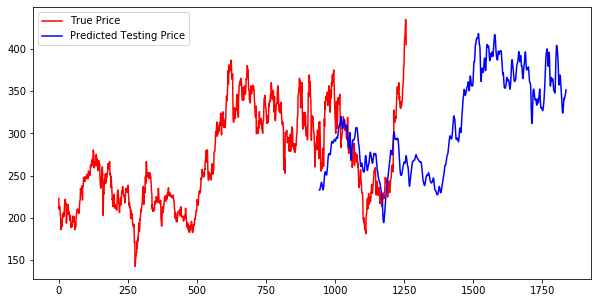

In [84]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()